In [1]:
# Add the relevant scripts from LArMachineLearningData
# Nice the process so it can run with lots of cores on low priority
import os
os.nice(20)

# Add local paths
import sys
hnlDIR = os.environ['_']
sys.path.append('../pyscript')

# From pyscript Library
from Plotting import *
from Dictionary import *
from HelperFunctions import *
from CutFunctions import *

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

<h1>Configuration Stuff Here</h1>

In [2]:
m = 200
ifSave = True
savePath = "../plot_files/14Mar2024_EnergyCorrection/"

<h1> Read in PKL Dataframe </h1>

<h3> HNL </h3>

In [3]:
df_hnl = pd.DataFrame()

for i in range(0, 3):
    hnl_path = "../pkl_files/v3/hnl_m"+str(m)+"_50k_v3_slc_{}.pkl".format(i)
    print(hnl_path)
    
    file = open(hnl_path, 'rb')
    df = pickle.load(file)
    
    df_hnl = pd.concat((df_hnl, df), ignore_index=True)
    file.close()
    
#--------------------------------------------------#
dfsubrun_hnl = pd.DataFrame()

for i in range(0, 3):
    hnl_path = "../pkl_files/v3/hnl_m"+str(m)+"_50k_v3_subrun_{}.pkl".format(i)
    print(hnl_path)
    
    file = open(hnl_path, 'rb')
    df = pickle.load(file)
    
    dfsubrun_hnl = pd.concat((dfsubrun_hnl, df), ignore_index=True)
    file.close()

../pkl_files/v3/hnl_m200_50k_v3_slc_0.pkl
../pkl_files/v3/hnl_m200_50k_v3_slc_1.pkl
../pkl_files/v3/hnl_m200_50k_v3_slc_2.pkl
../pkl_files/v3/hnl_m200_50k_v3_subrun_0.pkl
../pkl_files/v3/hnl_m200_50k_v3_subrun_1.pkl
../pkl_files/v3/hnl_m200_50k_v3_subrun_2.pkl


<h3> TPC Neutrino </h3>

In [4]:
df_nu = pd.DataFrame()

for i in range(0, 13):
    nu_path = "../pkl_files/v3/rockbox_100k_v3_slc_{}.pkl".format(i)
    print(nu_path)
    
    file = open(nu_path, 'rb')
    df = pickle.load(file)
    
    df_nu = pd.concat((df_nu, df), ignore_index=True)
    file.close()
    
#--------------------------------------------------#
dfsubrun_nu = pd.DataFrame()

for i in range(0, 13):
    nu_path = "../pkl_files/v3/rockbox_100k_v3_subrun_{}.pkl".format(i)
    print(nu_path)
    
    file = open(nu_path, 'rb')
    df = pickle.load(file)
    
    dfsubrun_nu = pd.concat((dfsubrun_nu, df), ignore_index=True)
    file.close()

../pkl_files/v3/rockbox_100k_v3_slc_0.pkl
../pkl_files/v3/rockbox_100k_v3_slc_1.pkl
../pkl_files/v3/rockbox_100k_v3_slc_2.pkl
../pkl_files/v3/rockbox_100k_v3_slc_3.pkl
../pkl_files/v3/rockbox_100k_v3_slc_4.pkl
../pkl_files/v3/rockbox_100k_v3_slc_5.pkl
../pkl_files/v3/rockbox_100k_v3_slc_6.pkl
../pkl_files/v3/rockbox_100k_v3_slc_7.pkl
../pkl_files/v3/rockbox_100k_v3_slc_8.pkl
../pkl_files/v3/rockbox_100k_v3_slc_9.pkl
../pkl_files/v3/rockbox_100k_v3_slc_10.pkl
../pkl_files/v3/rockbox_100k_v3_slc_11.pkl
../pkl_files/v3/rockbox_100k_v3_slc_12.pkl
../pkl_files/v3/rockbox_100k_v3_subrun_0.pkl
../pkl_files/v3/rockbox_100k_v3_subrun_1.pkl
../pkl_files/v3/rockbox_100k_v3_subrun_2.pkl
../pkl_files/v3/rockbox_100k_v3_subrun_3.pkl
../pkl_files/v3/rockbox_100k_v3_subrun_4.pkl
../pkl_files/v3/rockbox_100k_v3_subrun_5.pkl
../pkl_files/v3/rockbox_100k_v3_subrun_6.pkl
../pkl_files/v3/rockbox_100k_v3_subrun_7.pkl
../pkl_files/v3/rockbox_100k_v3_subrun_8.pkl
../pkl_files/v3/rockbox_100k_v3_subrun_9.pkl
.

<h3> Intime Cosmics </h3>

In [5]:
df_cos = pd.DataFrame()

for i in range(0, 3):
    cos_path = "../pkl_files/v3/intime_50k_v3_slc_{}.pkl".format(i)
    print(cos_path)
    
    file = open(cos_path, 'rb')
    df = pickle.load(file)
    
    df_cos = pd.concat((df_cos, df), ignore_index=True)
    file.close()
    
#--------------------------------------------------#
dfsubrun_cos = pd.DataFrame()

for i in range(0, 3):
    cos_path = "../pkl_files/v3/intime_50k_v3_subrun_{}.pkl".format(i)
    print(cos_path)
    
    file = open(cos_path, 'rb')
    df = pickle.load(file)
    
    dfsubrun_cos = pd.concat((dfsubrun_cos, df), ignore_index=True)
    file.close()

../pkl_files/v3/intime_50k_v3_slc_0.pkl
../pkl_files/v3/intime_50k_v3_slc_1.pkl
../pkl_files/v3/intime_50k_v3_slc_2.pkl
../pkl_files/v3/intime_50k_v3_subrun_0.pkl
../pkl_files/v3/intime_50k_v3_subrun_1.pkl
../pkl_files/v3/intime_50k_v3_subrun_2.pkl


In [6]:
df_nu.columns

Index(['run', 'subrun', 'event', 'slc_id', 'slc_vtx_x', 'slc_vtx_y',
       'slc_vtx_z', 'slc_is_fv', 'slc_crumbs_score', 'slc_opt0_score',
       'slc_opt0_measPE', 'slc_opt0_frac', 'slc_opt0_time_corrected_Z_pandora',
       'slc_total_shower_E', 'slc_total_track_E', 'slc_n_razzled_electrons',
       'slc_n_razzled_muons', 'slc_n_razzled_photons',
       'slc_n_razzled_pions_thresh', 'slc_n_razzled_protons_thresh',
       'slc_comp', 'slc_true_event_type', 'slc_true_en_dep', 'slc_idx',
       'slc_pfp_n_hits', 'slc_pfp_track_score',
       'slc_pfp_razzled_electron_score', 'slc_pfp_razzled_muon_score',
       'slc_pfp_razzled_photon_score', 'slc_pfp_razzled_pion_score',
       'slc_pfp_razzled_proton_score', 'slc_pfp_true_pdg',
       'slc_pfp_true_energy', 'slc_pfp_track_end_x', 'slc_pfp_track_end_y',
       'slc_pfp_track_end_z', 'slc_pfp_track_dir_x', 'slc_pfp_track_dir_y',
       'slc_pfp_track_dir_z', 'slc_pfp_track_length', 'slc_pfp_track_ke',
       'slc_pfp_track_theta', 'slc

<h1>Some Clean Up </h1>

In [7]:
df_nu = df_nu[df_nu['slc_pfp_true_energy']!= -99999]
df_hnl = df_hnl[df_hnl['slc_pfp_true_energy']!= -99999]
df_cos = df_cos[df_cos['slc_pfp_true_energy']!= -99999]

In [8]:
df_nu['slc_pfp_true_energy'] = df_nu['slc_pfp_true_energy'] * 1000
df_hnl['slc_pfp_true_energy'] = df_hnl['slc_pfp_true_energy'] * 1000
df_cos['slc_pfp_true_energy'] = df_cos['slc_pfp_true_energy'] * 1000

In [9]:
df_nu['reco_truth_diff'] = df_nu['slc_pfp_shower_energy'] - df_nu['slc_pfp_true_energy']
df_hnl['reco_truth_diff'] = df_hnl['slc_pfp_shower_energy'] - df_hnl['slc_pfp_true_energy']
df_cos['reco_truth_diff'] = df_cos['slc_pfp_shower_energy'] - df_cos['slc_pfp_true_energy']

<h1> Keep Track Score < 0.51 and PDG = +-11, 22 </h1>

In [10]:
#keep shower pfp only to make it easy

whenCos = (df_cos['slc_pfp_track_score'] < 0.51) \
    & ((df_cos['slc_pfp_true_pdg'] == 22) | (df_cos['slc_pfp_true_pdg'] == 11) | (df_cos['slc_pfp_true_pdg'] == -11) ) 

whenHNL = (df_hnl['slc_pfp_track_score'] < 0.51) \
    & ((df_hnl['slc_pfp_true_pdg'] == 22) | (df_hnl['slc_pfp_true_pdg'] == 11) | (df_hnl['slc_pfp_true_pdg'] == -11) ) 

whenNu = (df_nu['slc_pfp_track_score'] < 0.51) \
    & ((df_nu['slc_pfp_true_pdg'] == 22) | (df_nu['slc_pfp_true_pdg'] == 11) | (df_nu['slc_pfp_true_pdg'] == -11) ) 


In [11]:
df_cos = df_cos[whenCos]
df_nu = df_nu[whenNu]
df_hnl = df_hnl[whenHNL]

<h1> Keep only primary shower </h1>

In [12]:
def split_my_df(df):
    temp = df[['run', 'subrun', 'event', 'slc_idx','slc_opt0_frac'
                   , 'slc_pfp_shower_energy', 'slc_pfp_true_energy', 'reco_truth_diff'
                  ]]
    #temp["pfp_idx"] = temp.groupby(['run', 'subrun', 'event', 'slc_idx']).transform("cumcount").add(1) - 1
    temp = temp.set_index(['run', 'subrun', 'event', 'slc_idx']).reset_index()
    
    temp1 = temp.groupby(['run', 'subrun', 'event', 'slc_idx'])['slc_pfp_shower_energy'].apply(list).reset_index()
    temp2 = temp.groupby(['run', 'subrun', 'event', 'slc_idx'])['slc_pfp_true_energy'].apply(list).reset_index()
    temp3 = temp.groupby(['run', 'subrun', 'event', 'slc_idx'])['reco_truth_diff'].apply(list).reset_index()

    
    concat = pd.concat([temp1, temp2, temp3], axis = 1)
    
    concat = concat.loc[:, ~concat.columns.duplicated()]
    
    concat['n_pfp'] = concat.apply(lambda row: len(row['slc_pfp_shower_energy']), axis=1)
    
    #1 shower selection
    shw1 = concat[concat['n_pfp'] == 1]
    shw1 = shw1.drop(columns = ['slc_pfp_shower_energy', 'slc_pfp_true_energy', 'reco_truth_diff'])
    shw1 = shw1.merge(temp, how='inner', on=['run','subrun','event','slc_idx'])
    
    #2+ shower selection
    shw2more = concat[concat['n_pfp'] >= 2]
    
    temp = temp.drop(columns = ['slc_pfp_shower_energy', 'slc_pfp_true_energy', 'reco_truth_diff'])
    temp = temp[~temp.duplicated(['run','subrun','event','slc_idx'])]
    
    shw2more = shw2more.merge(temp, how='inner', on=['run','subrun','event','slc_idx'])
    
    return shw1, shw2more

In [13]:
df_hnl_shw1, df_hnl_shw2 = split_my_df(df_hnl)

df_nu_shw1, df_nu_shw2 = split_my_df(df_nu)

df_cos_shw1, df_cos_shw2 = split_my_df(df_cos)

In [14]:
df_nu_shw2 = df_nu_shw2.apply(pd.Series.explode).reset_index()
df_hnl_shw2 = df_hnl_shw2.apply(pd.Series.explode).reset_index()
df_cos_shw2 = df_cos_shw2.apply(pd.Series.explode).reset_index()

In [15]:
df_hnl_prim_shw2 = get_primary_shw_df(df_hnl_shw2)

df_nu_prim_shw2 = get_primary_shw_df(df_nu_shw2)

df_cos_prim_shw2 = get_primary_shw_df(df_cos_shw2)

In [16]:
df_hnl_shw1

,run,subrun,event,slc_idx,n_pfp,slc_opt0_frac,slc_pfp_shower_energy,slc_pfp_true_energy,reco_truth_diff
0,1,1,1,2,1,-0.176113,18.715569,390.066087,-371.350519
1,1,1,2,0,1,-0.205605,54.371312,98.845325,-44.474014
2,1,1,8,0,1,0.015018,105.504963,115.06696,-9.561998
3,1,1,11,1,1,0.205435,1207.555739,1010.4599,197.095839
4,1,1,12,0,1,0.483409,15.019956,41.894406,-26.87445
...,...,...,...,...,...,...,...,...,...
15691,1,558,45,1,1,10.126778,24.205494,34.183979,-9.978485
15692,1,558,45,2,1,0.058556,453.160829,519.368649,-66.207819
15693,1,558,47,0,1,-99999.000000,1019.747832,1010.684848,9.062985
15694,1,558,48,3,1,-99999.000000,30.393827,57.35267,-26.958842


<h1>True PFP Energy</h1>

<h3>One Shower</h3>

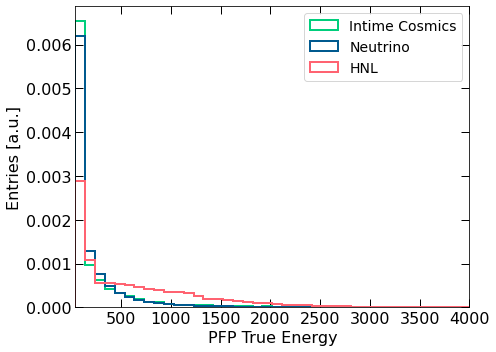

In [17]:
fig, (ax) = plt.subplots(1, 1, figsize=(7, 5), sharey= True, sharex = True)

xmin, xmax, xnbin = 40, 4000, 40
xlimmin, xlimmax = xmin, xmax
#----------------------------------------------
pltdf = df_cos_shw1['slc_pfp_true_energy']
plot_1dhist(    pltdf, 
                ax,
                xmin, xmax, xnbin,
                xlimmin, xlimmax,
                ifnorm = True, 
                histtype = 'step', 
                linecolor = col_dict['MintGreen'],
                linewidth = 2,
                label = 'Intime Cosmics',
                iflabelbox = True,
           )

#----------------------------------------------
pltdf = df_nu_shw1['slc_pfp_true_energy']
plot_1dhist(    pltdf, 
                ax,
                xmin, xmax, xnbin,
                xlimmin, xlimmax,
                ifnorm = True, 
                histtype = 'step', 
                linecolor = col_dict['Teal'],
                linewidth = 2,
                label = 'Neutrino',
           )
#----------------------------------------------
pltdf = df_hnl_shw1['slc_pfp_true_energy']
plot_1dhist(    pltdf, 
                ax,
                xmin, xmax, xnbin,
                xlimmin, xlimmax,
                ifnorm = True, 
                xtitle = 'PFP True Energy', ytitle = 'Entries [a.u.]',
                histtype = 'step', 
                linecolor = col_dict['Flamingo'],
                linewidth = 2,
                label = 'HNL',
                iflabelbox = True,
           )
#----------------------------------------------
fig.tight_layout()
plt.savefig(savePath+"truth_energy.png", dpi=200)
plt.show()

<h3>Primary of Two+ Shower</h3>

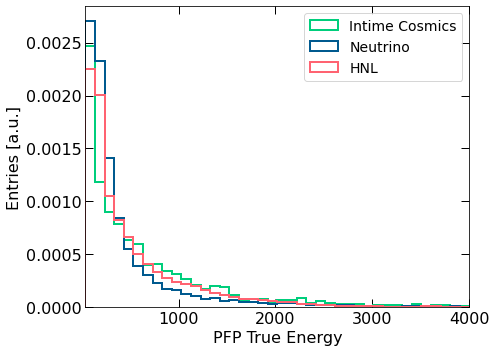

In [18]:
fig, (ax) = plt.subplots(1, 1, figsize=(7, 5), sharey= True, sharex = True)

xmin, xmax, xnbin = 40, 4000, 40
xlimmin, xlimmax = xmin, xmax
#----------------------------------------------
pltdf = df_cos_prim_shw2['slc_pfp_true_energy']
plot_1dhist(    pltdf, 
                ax,
                xmin, xmax, xnbin,
                xlimmin, xlimmax,
                ifnorm = True, 
                histtype = 'step', 
                linecolor = col_dict['MintGreen'],
                linewidth = 2,
                label = 'Intime Cosmics',
                iflabelbox = True,
           )

#----------------------------------------------
pltdf = df_nu_prim_shw2['slc_pfp_true_energy']
plot_1dhist(    pltdf, 
                ax,
                xmin, xmax, xnbin,
                xlimmin, xlimmax,
                ifnorm = True, 
                histtype = 'step', 
                linecolor = col_dict['Teal'],
                linewidth = 2,
                label = 'Neutrino',
           )
#----------------------------------------------
pltdf = df_hnl_prim_shw2['slc_pfp_true_energy']
plot_1dhist(    pltdf, 
                ax,
                xmin, xmax, xnbin,
                xlimmin, xlimmax,
                ifnorm = True, 
                xtitle = 'PFP True Energy', ytitle = 'Entries [a.u.]',
                histtype = 'step', 
                linecolor = col_dict['Flamingo'],
                linewidth = 2,
                label = 'HNL',
                iflabelbox = True,
           )
#----------------------------------------------
fig.tight_layout()
plt.savefig(savePath+"truth_energy.png", dpi=200)
plt.show()

<h1>Reco Energy</h1>

<h3>One Shower </h3>

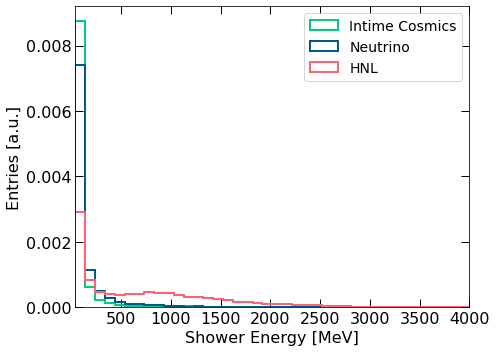

In [19]:
fig, (ax) = plt.subplots(1, 1, figsize=(7, 5), sharey= True, sharex = True)

xmin, xmax, xnbin = 40, 4000, 40
xlimmin, xlimmax = xmin, xmax
#----------------------------------------------
pltdf = df_cos_shw1['slc_pfp_shower_energy']
plot_1dhist(    pltdf, 
                ax,
                xmin, xmax, xnbin,
                xlimmin, xlimmax,
                ifnorm = True, 
                histtype = 'step', 
                linecolor = col_dict['MintGreen'],
                linewidth = 2,
                label = 'Intime Cosmics',
                iflabelbox = True,
           )

#----------------------------------------------
pltdf = df_nu_shw1['slc_pfp_shower_energy']
plot_1dhist(    pltdf, 
                ax,
                xmin, xmax, xnbin,
                xlimmin, xlimmax,
                ifnorm = True, 
                histtype = 'step', 
                linecolor = col_dict['Teal'],
                linewidth = 2,
                label = 'Neutrino',
           )
#----------------------------------------------
pltdf = df_hnl_shw1['slc_pfp_shower_energy']
plot_1dhist(    pltdf, 
                ax,
                xmin, xmax, xnbin,
                xlimmin, xlimmax,
                ifnorm = True, 
                xtitle = 'Shower Energy [MeV]', ytitle = 'Entries [a.u.]',
                histtype = 'step', 
                linecolor = col_dict['Flamingo'],
                linewidth = 2,
                label = 'HNL',
                iflabelbox = True,
           )
#----------------------------------------------
fig.tight_layout()
plt.savefig(savePath+"reco_energy.png", dpi=200)
plt.show()

<h3>Primary Two+ Shower</h3>

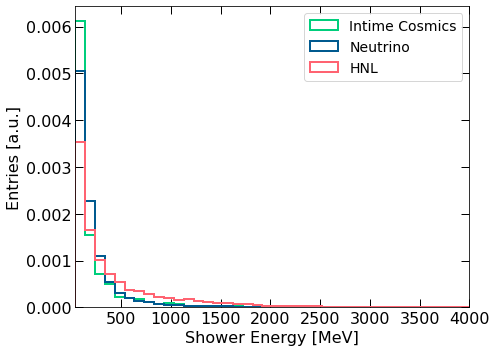

In [20]:
fig, (ax) = plt.subplots(1, 1, figsize=(7, 5), sharey= True, sharex = True)

xmin, xmax, xnbin = 40, 4000, 40
xlimmin, xlimmax = xmin, xmax
#----------------------------------------------
pltdf = df_cos_prim_shw2['slc_pfp_shower_energy']
plot_1dhist(    pltdf, 
                ax,
                xmin, xmax, xnbin,
                xlimmin, xlimmax,
                ifnorm = True, 
                histtype = 'step', 
                linecolor = col_dict['MintGreen'],
                linewidth = 2,
                label = 'Intime Cosmics',
                iflabelbox = True,
           )

#----------------------------------------------
pltdf = df_nu_prim_shw2['slc_pfp_shower_energy']
plot_1dhist(    pltdf, 
                ax,
                xmin, xmax, xnbin,
                xlimmin, xlimmax,
                ifnorm = True, 
                histtype = 'step', 
                linecolor = col_dict['Teal'],
                linewidth = 2,
                label = 'Neutrino',
           )
#----------------------------------------------
pltdf = df_hnl_prim_shw2['slc_pfp_shower_energy']
plot_1dhist(    pltdf, 
                ax,
                xmin, xmax, xnbin,
                xlimmin, xlimmax,
                ifnorm = True, 
                xtitle = 'Shower Energy [MeV]', ytitle = 'Entries [a.u.]',
                histtype = 'step', 
                linecolor = col_dict['Flamingo'],
                linewidth = 2,
                label = 'HNL',
                iflabelbox = True,
           )
#----------------------------------------------
fig.tight_layout()
plt.savefig(savePath+"reco_energy.png", dpi=200)
plt.show()

<h1> Reco - True Energy 1D</h1>

<h3>One Shower</h3>

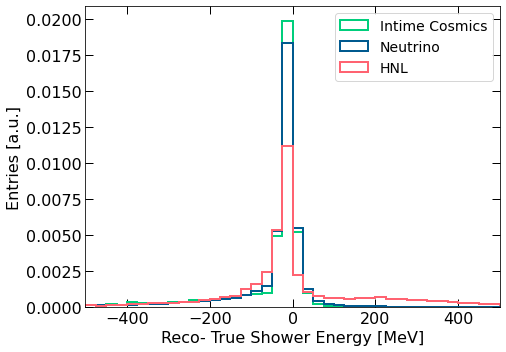

In [54]:
fig, (ax) = plt.subplots(1, 1, figsize=(7, 5), sharey= True, sharex = True)

xmin, xmax, xnbin = -500, 500, 40
xlimmin, xlimmax = xmin, xmax

#----------------------------------------------
pltdf = df_cos_shw1['reco_truth_diff']
plot_1dhist(    pltdf, 
                ax,
                xmin, xmax, xnbin,
                xlimmin, xlimmax,
                ifnorm = True, 
                histtype = 'step', 
                linecolor = col_dict['MintGreen'],
                linewidth = 2,
                label = 'Intime Cosmics',
                iflabelbox = True,
           )

#----------------------------------------------
pltdf = df_nu_shw1['reco_truth_diff']
plot_1dhist(    pltdf, 
                ax,
                xmin, xmax, xnbin,
                xlimmin, xlimmax,
                ifnorm = True, 
                histtype = 'step', 
                linecolor = col_dict['Teal'],
                linewidth = 2,
                label = 'Neutrino',
           )
#----------------------------------------------
pltdf = df_hnl_shw1['reco_truth_diff']
plot_1dhist(    pltdf, 
                ax,
                xmin, xmax, xnbin,
                xlimmin, xlimmax,
                ifnorm = True, 
                xtitle = 'Reco- True Shower Energy [MeV]', ytitle = 'Entries [a.u.]',
                histtype = 'step', 
                linecolor = col_dict['Flamingo'],
                linewidth = 2,
                label = 'HNL',
                iflabelbox = True,
           )
#----------------------------------------------
fig.tight_layout()
plt.savefig(savePath+"energy_shower_like.png", dpi=200)
plt.show()

<h3>Primary Two+ Showers</h3>

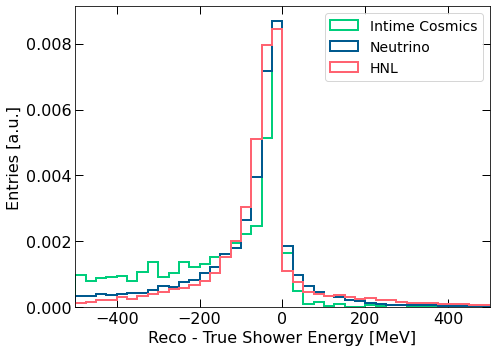

In [53]:
fig, (ax) = plt.subplots(1, 1, figsize=(7, 5), sharey= True, sharex = True)

xmin, xmax, xnbin = -500, 500, 40
xlimmin, xlimmax = xmin, xmax

#----------------------------------------------
pltdf = df_cos_prim_shw2['reco_truth_diff']
plot_1dhist(    pltdf, 
                ax,
                xmin, xmax, xnbin,
                xlimmin, xlimmax,
                ifnorm = True, 
                histtype = 'step', 
                linecolor = col_dict['MintGreen'],
                linewidth = 2,
                label = 'Intime Cosmics',
                iflabelbox = True,
           )

#----------------------------------------------
pltdf = df_nu_prim_shw2['reco_truth_diff']
plot_1dhist(    pltdf, 
                ax,
                xmin, xmax, xnbin,
                xlimmin, xlimmax,
                ifnorm = True, 
                histtype = 'step', 
                linecolor = col_dict['Teal'],
                linewidth = 2,
                label = 'Neutrino',
           )
#----------------------------------------------
pltdf = df_hnl_prim_shw2['reco_truth_diff']
plot_1dhist(    pltdf, 
                ax,
                xmin, xmax, xnbin,
                xlimmin, xlimmax,
                ifnorm = True, 
                    xtitle = 'Reco - True Shower Energy [MeV]', ytitle = 'Entries [a.u.]',
                histtype = 'step', 
                linecolor = col_dict['Flamingo'],
                linewidth = 2,
                label = 'HNL',
                iflabelbox = True,
           )
#----------------------------------------------
fig.tight_layout()
plt.savefig(savePath+"energy_shower_like.png", dpi=200)
plt.show()

<h1> Reco vs True Energy 2D</h1>

<h3>One Shower</h3>

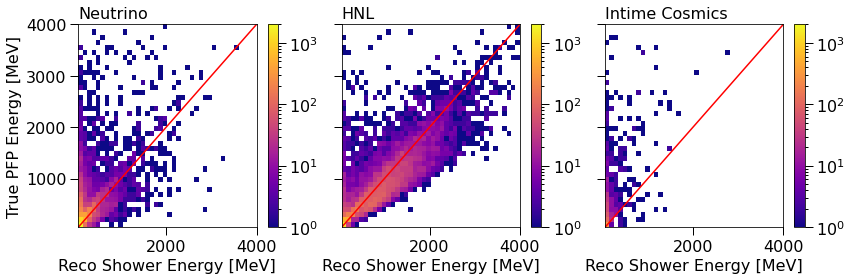

In [37]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4), sharey= True, sharex = True)

xmin, xmax = 50, 4000
xnbin = 40

ymin, ymax = 50, 4000
ynbin = 40

xlimmin, xlimmax = xmin, xmax
ylimmin, ylimmax = ymin, ymax
#----------------------------------------------
plot_2dhist( df_nu_shw1['slc_pfp_shower_energy'], df_nu_shw1['slc_pfp_true_energy'], 
            ax1, fig, 
            xmin, xmax, ymin, ymax, xnbin, ynbin,
            xlimmin, xlimmax, ylimmin, ylimmax,
            ifcbar =True,
            iflog = True, cmin= 1, cmax =2000,
            #weights = df_nu['scale_pot'],
            title = 'Neutrino', xtitle = 'Reco Shower Energy [MeV]', ytitle= 'True PFP Energy [MeV]'
                )
#----------------------------------------------

plot_2dhist( df_hnl_shw1['slc_pfp_shower_energy'], df_hnl_shw1['slc_pfp_true_energy'], 
            ax2, fig, 
            xmin, xmax, ymin, ymax, xnbin, ynbin,
            xlimmin, xlimmax, ylimmin, ylimmax,
            ifcbar =True,
            iflog = True, cmin= 1, cmax =2000,
            #weights = df_hnl['scale_pot'],
            title = 'HNL', xtitle = 'Reco Shower Energy [MeV]', ytitle= ''
                )
#----------------------------------------------

plot_2dhist( df_cos_shw1['slc_pfp_shower_energy'], df_cos_shw1['slc_pfp_true_energy'], 
            ax3, fig, 
            xmin, xmax, ymin, ymax, xnbin, ynbin,
            xlimmin, xlimmax, ylimmin, ylimmax,
            ifcbar =True,
            iflog = True, cmin= 1, cmax =2000,
            #weights = df_cos['scale_pot'],
            title = 'Intime Cosmics', xtitle = 'Reco Shower Energy [MeV]', ytitle= ''
                )
#----------------------------------------------
#plt.ylim(0,40)

ax1.tick_params(bottom = True, top = False, left = True, right = False)
ax1.tick_params(axis = 'x', labelsize = 16, direction = 'out')
ax1.tick_params(axis = 'y', labelsize = 16, direction = 'out')

ax2.tick_params(bottom = True, top = False, left = True, right = False)
ax2.tick_params(axis = 'x', labelsize = 16, direction = 'out')
ax2.tick_params(axis = 'y', labelsize = 16, direction = 'out')

ax3.tick_params(bottom = True, top = False, left = True, right = False)
ax3.tick_params(axis = 'x', labelsize = 16, direction = 'out')
ax3.tick_params(axis = 'y', labelsize = 16, direction = 'out')
#----------------------------------------------
x = np.arange(0, 4000, 10)
y = np.arange(0, 4000, 10)

ax1.plot(x, y, color= 'r')
ax2.plot(x, y, color= 'r')
ax3.plot(x, y, color= 'r')
#----------------------------------------------

fig.tight_layout()
plt.savefig(savePath+"truth_energy_shower_like.png", dpi=200)
plt.show()

<h3>Primary Two+ Showers</h3>

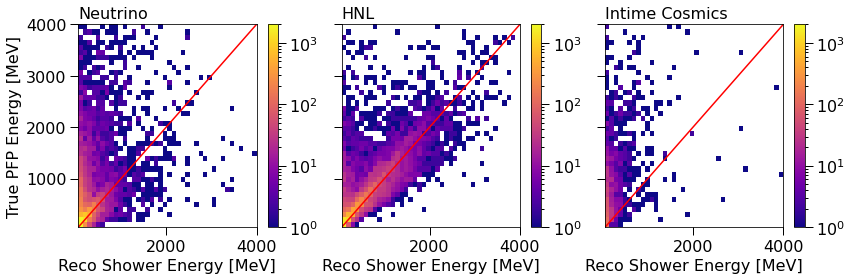

In [38]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4), sharey= True, sharex = True)

xmin, xmax = 50, 4000
xnbin = 40

ymin, ymax = 50, 4000
ynbin = 40

xlimmin, xlimmax = xmin, xmax
ylimmin, ylimmax = ymin, ymax
#----------------------------------------------
plot_2dhist( df_nu_prim_shw2['slc_pfp_shower_energy'], df_nu_prim_shw2['slc_pfp_true_energy'], 
            ax1, fig, 
            xmin, xmax, ymin, ymax, xnbin, ynbin,
            xlimmin, xlimmax, ylimmin, ylimmax,
            ifcbar =True,
            iflog = True, cmin= 1, cmax =2000,
            #weights = df_nu['scale_pot'],
            title = 'Neutrino', xtitle = 'Reco Shower Energy [MeV]', ytitle= 'True PFP Energy [MeV]'
                )
#----------------------------------------------

plot_2dhist( df_hnl_prim_shw2['slc_pfp_shower_energy'], df_hnl_prim_shw2['slc_pfp_true_energy'], 
            ax2, fig, 
            xmin, xmax, ymin, ymax, xnbin, ynbin,
            xlimmin, xlimmax, ylimmin, ylimmax,
            ifcbar =True,
            iflog = True, cmin= 1, cmax =2000,
            #weights = df_hnl['scale_pot'],
            title = 'HNL', xtitle = 'Reco Shower Energy [MeV]', ytitle= ''
                )
#----------------------------------------------

plot_2dhist( df_cos_prim_shw2['slc_pfp_shower_energy'], df_cos_prim_shw2['slc_pfp_true_energy'], 
            ax3, fig, 
            xmin, xmax, ymin, ymax, xnbin, ynbin,
            xlimmin, xlimmax, ylimmin, ylimmax,
            ifcbar =True,
            iflog = True, cmin= 1, cmax =2000,
            #weights = df_cos['scale_pot'],
            title = 'Intime Cosmics', xtitle = 'Reco Shower Energy [MeV]', ytitle= ''
                )
#----------------------------------------------
#plt.ylim(0,40)

ax1.tick_params(bottom = True, top = False, left = True, right = False)
ax1.tick_params(axis = 'x', labelsize = 16, direction = 'out')
ax1.tick_params(axis = 'y', labelsize = 16, direction = 'out')

ax2.tick_params(bottom = True, top = False, left = True, right = False)
ax2.tick_params(axis = 'x', labelsize = 16, direction = 'out')
ax2.tick_params(axis = 'y', labelsize = 16, direction = 'out')

ax3.tick_params(bottom = True, top = False, left = True, right = False)
ax3.tick_params(axis = 'x', labelsize = 16, direction = 'out')
ax3.tick_params(axis = 'y', labelsize = 16, direction = 'out')
#----------------------------------------------
x = np.arange(0, 4000, 10)
y = np.arange(0, 4000, 10)

ax1.plot(x, y, color= 'r')
ax2.plot(x, y, color= 'r')
ax3.plot(x, y, color= 'r')
#----------------------------------------------

fig.tight_layout()
plt.savefig(savePath+"truth_energy_shower_like.png", dpi=200)
plt.show()

<h1> Reco - True Diff Energy 2D</h1>

<h3>One Shower</h3>

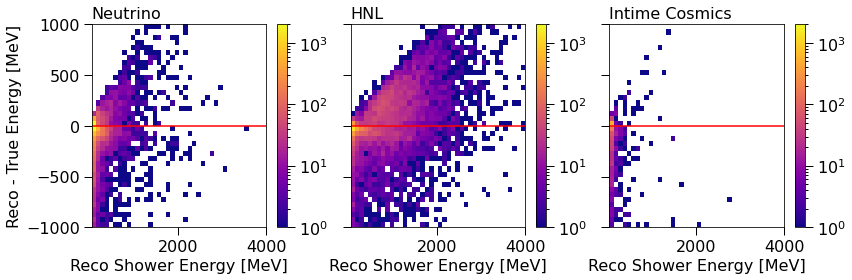

In [39]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4), sharey= True, sharex = True)

xmin, xmax = 50, 4000
xnbin = 40

ymin, ymax = -1000, 1000
ynbin = 40

xlimmin, xlimmax = xmin, xmax
ylimmin, ylimmax = ymin, ymax
#----------------------------------------------
plot_2dhist( df_nu_shw1['slc_pfp_shower_energy'], df_nu_shw1['reco_truth_diff'], 
            ax1, fig, 
            xmin, xmax, ymin, ymax, xnbin, ynbin,
            xlimmin, xlimmax, ylimmin, ylimmax,
            ifcbar =True,
            iflog = True, cmin= 1, cmax =2000,
            #weights = df_nu['scale_pot'],
            title = 'Neutrino', xtitle = 'Reco Shower Energy [MeV]', ytitle= 'Reco - True Energy [MeV]'
                )
#----------------------------------------------

plot_2dhist( df_hnl_shw1['slc_pfp_shower_energy'], df_hnl_shw1['reco_truth_diff'], 
            ax2, fig, 
            xmin, xmax, ymin, ymax, xnbin, ynbin,
            xlimmin, xlimmax, ylimmin, ylimmax,
            ifcbar =True,
            iflog = True, cmin= 1, cmax =2000,
            #weights = df_hnl['scale_pot'],
            title = 'HNL', xtitle = 'Reco Shower Energy [MeV]', ytitle= ''
                )
#----------------------------------------------

plot_2dhist( df_cos_shw1['slc_pfp_shower_energy'], df_cos_shw1['reco_truth_diff'], 
            ax3, fig, 
            xmin, xmax, ymin, ymax, xnbin, ynbin,
            xlimmin, xlimmax, ylimmin, ylimmax,
            ifcbar =True,
            iflog = True, cmin= 1, cmax =2000,
            #weights = df_cos['scale_pot'],
            title = 'Intime Cosmics', xtitle = 'Reco Shower Energy [MeV]', ytitle= ''
                )
#----------------------------------------------
#plt.ylim(0,40)

ax1.tick_params(bottom = True, top = False, left = True, right = False)
ax1.tick_params(axis = 'x', labelsize = 16, direction = 'out')
ax1.tick_params(axis = 'y', labelsize = 16, direction = 'out')

ax2.tick_params(bottom = True, top = False, left = True, right = False)
ax2.tick_params(axis = 'x', labelsize = 16, direction = 'out')
ax2.tick_params(axis = 'y', labelsize = 16, direction = 'out')

ax3.tick_params(bottom = True, top = False, left = True, right = False)
ax3.tick_params(axis = 'x', labelsize = 16, direction = 'out')
ax3.tick_params(axis = 'y', labelsize = 16, direction = 'out')
#----------------------------------------------
# specifying horizontal line type 
ax1.axhline(y = 0, color = 'r', linestyle = '-') 
ax2.axhline(y = 0, color = 'r', linestyle = '-') 
ax3.axhline(y = 0, color = 'r', linestyle = '-') 
#----------------------------------------------

fig.tight_layout()
plt.savefig(savePath+"truth_energy_shower_like.png", dpi=200)
plt.show()

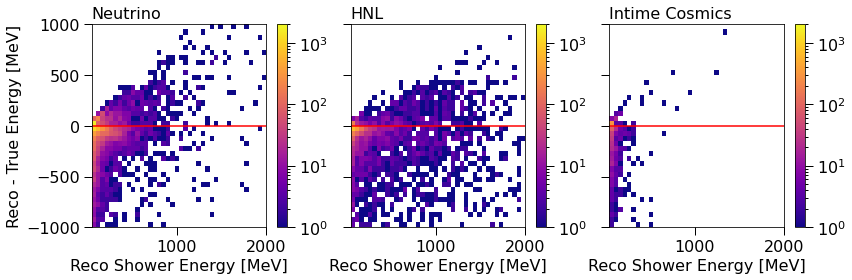

In [47]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4), sharey= True, sharex = True)

xmin, xmax = 50, 2000
xnbin = 40

ymin, ymax = -1000, 1000
ynbin = 40

xlimmin, xlimmax = xmin, xmax
ylimmin, ylimmax = ymin, ymax
#----------------------------------------------
when = df_nu_shw1['slc_opt0_frac'] < 0
plot_2dhist( df_nu_shw1['slc_pfp_shower_energy'][when], df_nu_shw1['reco_truth_diff'][when], 
            ax1, fig, 
            xmin, xmax, ymin, ymax, xnbin, ynbin,
            xlimmin, xlimmax, ylimmin, ylimmax,
            ifcbar =True,
            iflog = True, cmin= 1, cmax =2000,
            #weights = df_nu['scale_pot'],
            title = 'Neutrino', xtitle = 'Reco Shower Energy [MeV]', ytitle= 'Reco - True Energy [MeV]'
                )
#----------------------------------------------
when = df_hnl_shw1['slc_opt0_frac'] < 0
plot_2dhist( df_hnl_shw1['slc_pfp_shower_energy'][when], df_hnl_shw1['reco_truth_diff'][when], 
            ax2, fig, 
            xmin, xmax, ymin, ymax, xnbin, ynbin,
            xlimmin, xlimmax, ylimmin, ylimmax,
            ifcbar =True,
            iflog = True, cmin= 1, cmax =2000,
            #weights = df_hnl['scale_pot'],
            title = 'HNL', xtitle = 'Reco Shower Energy [MeV]', ytitle= ''
                )
#----------------------------------------------
when = df_cos_shw1['slc_opt0_frac'] < 0
plot_2dhist( df_cos_shw1['slc_pfp_shower_energy'][when], df_cos_shw1['reco_truth_diff'][when], 
            ax3, fig, 
            xmin, xmax, ymin, ymax, xnbin, ynbin,
            xlimmin, xlimmax, ylimmin, ylimmax,
            ifcbar =True,
            iflog = True, cmin= 1, cmax =2000,
            #weights = df_cos['scale_pot'],
            title = 'Intime Cosmics', xtitle = 'Reco Shower Energy [MeV]', ytitle= ''
                )
#----------------------------------------------
#plt.ylim(0,40)

ax1.tick_params(bottom = True, top = False, left = True, right = False)
ax1.tick_params(axis = 'x', labelsize = 16, direction = 'out')
ax1.tick_params(axis = 'y', labelsize = 16, direction = 'out')

ax2.tick_params(bottom = True, top = False, left = True, right = False)
ax2.tick_params(axis = 'x', labelsize = 16, direction = 'out')
ax2.tick_params(axis = 'y', labelsize = 16, direction = 'out')

ax3.tick_params(bottom = True, top = False, left = True, right = False)
ax3.tick_params(axis = 'x', labelsize = 16, direction = 'out')
ax3.tick_params(axis = 'y', labelsize = 16, direction = 'out')
#----------------------------------------------
# specifying horizontal line type 
ax1.axhline(y = 0, color = 'r', linestyle = '-') 
ax2.axhline(y = 0, color = 'r', linestyle = '-') 
ax3.axhline(y = 0, color = 'r', linestyle = '-') 
#----------------------------------------------

fig.tight_layout()
plt.savefig(savePath+"truth_energy_shower_like.png", dpi=200)
plt.show()

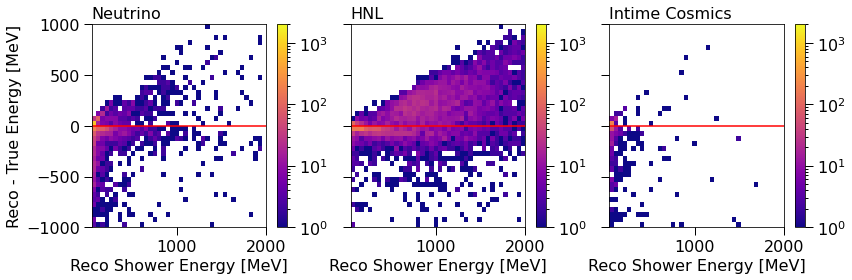

In [46]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4), sharey= True, sharex = True)

xmin, xmax = 50, 2000
xnbin = 40

ymin, ymax = -1000, 1000
ynbin = 40

xlimmin, xlimmax = xmin, xmax
ylimmin, ylimmax = ymin, ymax
#----------------------------------------------
when = df_nu_shw1['slc_opt0_frac'] > 0
plot_2dhist( df_nu_shw1['slc_pfp_shower_energy'][when], df_nu_shw1['reco_truth_diff'][when], 
            ax1, fig, 
            xmin, xmax, ymin, ymax, xnbin, ynbin,
            xlimmin, xlimmax, ylimmin, ylimmax,
            ifcbar =True,
            iflog = True, cmin= 1, cmax =2000,
            #weights = df_nu['scale_pot'],
            title = 'Neutrino', xtitle = 'Reco Shower Energy [MeV]', ytitle= 'Reco - True Energy [MeV]'
                )
#----------------------------------------------
when = df_hnl_shw1['slc_opt0_frac'] > 0
plot_2dhist( df_hnl_shw1['slc_pfp_shower_energy'][when], df_hnl_shw1['reco_truth_diff'][when], 
            ax2, fig, 
            xmin, xmax, ymin, ymax, xnbin, ynbin,
            xlimmin, xlimmax, ylimmin, ylimmax,
            ifcbar =True,
            iflog = True, cmin= 1, cmax =2000,
            #weights = df_hnl['scale_pot'],
            title = 'HNL', xtitle = 'Reco Shower Energy [MeV]', ytitle= ''
                )
#----------------------------------------------
when = df_cos_shw1['slc_opt0_frac'] > 0
plot_2dhist( df_cos_shw1['slc_pfp_shower_energy'][when], df_cos_shw1['reco_truth_diff'][when], 
            ax3, fig, 
            xmin, xmax, ymin, ymax, xnbin, ynbin,
            xlimmin, xlimmax, ylimmin, ylimmax,
            ifcbar =True,
            iflog = True, cmin= 1, cmax =2000,
            #weights = df_cos['scale_pot'],
            title = 'Intime Cosmics', xtitle = 'Reco Shower Energy [MeV]', ytitle= ''
                )
#----------------------------------------------
#plt.ylim(0,40)

ax1.tick_params(bottom = True, top = False, left = True, right = False)
ax1.tick_params(axis = 'x', labelsize = 16, direction = 'out')
ax1.tick_params(axis = 'y', labelsize = 16, direction = 'out')

ax2.tick_params(bottom = True, top = False, left = True, right = False)
ax2.tick_params(axis = 'x', labelsize = 16, direction = 'out')
ax2.tick_params(axis = 'y', labelsize = 16, direction = 'out')

ax3.tick_params(bottom = True, top = False, left = True, right = False)
ax3.tick_params(axis = 'x', labelsize = 16, direction = 'out')
ax3.tick_params(axis = 'y', labelsize = 16, direction = 'out')
#----------------------------------------------
# specifying horizontal line type 
ax1.axhline(y = 0, color = 'r', linestyle = '-') 
ax2.axhline(y = 0, color = 'r', linestyle = '-') 
ax3.axhline(y = 0, color = 'r', linestyle = '-') 
#----------------------------------------------

fig.tight_layout()
plt.savefig(savePath+"truth_energy_shower_like.png", dpi=200)
plt.show()

<h3>Primary Two+ Showers</h3>

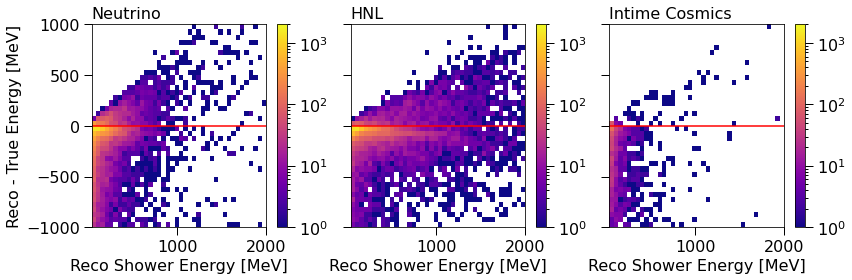

In [40]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4), sharey= True, sharex = True)

xmin, xmax = 40, 2000
xnbin = 40

ymin, ymax = -1000, 1000
ynbin = 40

xlimmin, xlimmax = xmin, xmax
ylimmin, ylimmax = ymin, ymax
#----------------------------------------------
plot_2dhist( df_nu_prim_shw2['slc_pfp_shower_energy'], df_nu_prim_shw2['reco_truth_diff'], 
            ax1, fig, 
            xmin, xmax, ymin, ymax, xnbin, ynbin,
            xlimmin, xlimmax, ylimmin, ylimmax,
            ifcbar =True,
            iflog = True, cmin= 1, cmax =2000,
            #weights = df_nu['scale_pot'],
            title = 'Neutrino', xtitle = 'Reco Shower Energy [MeV]', ytitle= 'Reco - True Energy [MeV]'
                )
#----------------------------------------------

plot_2dhist( df_hnl_prim_shw2['slc_pfp_shower_energy'], df_hnl_prim_shw2['reco_truth_diff'], 
            ax2, fig, 
            xmin, xmax, ymin, ymax, xnbin, ynbin,
            xlimmin, xlimmax, ylimmin, ylimmax,
            ifcbar =True,
            iflog = True, cmin= 1, cmax =2000,
            #weights = df_hnl['scale_pot'],
            title = 'HNL', xtitle = 'Reco Shower Energy [MeV]', ytitle= ''
                )
#----------------------------------------------

plot_2dhist( df_cos_prim_shw2['slc_pfp_shower_energy'], df_cos_prim_shw2['reco_truth_diff'], 
            ax3, fig, 
            xmin, xmax, ymin, ymax, xnbin, ynbin,
            xlimmin, xlimmax, ylimmin, ylimmax,
            ifcbar =True,
            iflog = True, cmin= 1, cmax =2000,
            #weights = df_cos['scale_pot'],
            title = 'Intime Cosmics', xtitle = 'Reco Shower Energy [MeV]', ytitle= ''
                )
#----------------------------------------------
#plt.ylim(0,40)

ax1.tick_params(bottom = True, top = False, left = True, right = False)
ax1.tick_params(axis = 'x', labelsize = 16, direction = 'out')
ax1.tick_params(axis = 'y', labelsize = 16, direction = 'out')

ax2.tick_params(bottom = True, top = False, left = True, right = False)
ax2.tick_params(axis = 'x', labelsize = 16, direction = 'out')
ax2.tick_params(axis = 'y', labelsize = 16, direction = 'out')

ax3.tick_params(bottom = True, top = False, left = True, right = False)
ax3.tick_params(axis = 'x', labelsize = 16, direction = 'out')
ax3.tick_params(axis = 'y', labelsize = 16, direction = 'out')
#----------------------------------------------
# specifying horizontal line type 
ax1.axhline(y = 0, color = 'r', linestyle = '-') 
ax2.axhline(y = 0, color = 'r', linestyle = '-') 
ax3.axhline(y = 0, color = 'r', linestyle = '-') 
#----------------------------------------------

fig.tight_layout()
plt.savefig(savePath+"truth_energy_shower_like.png", dpi=200)
plt.show()

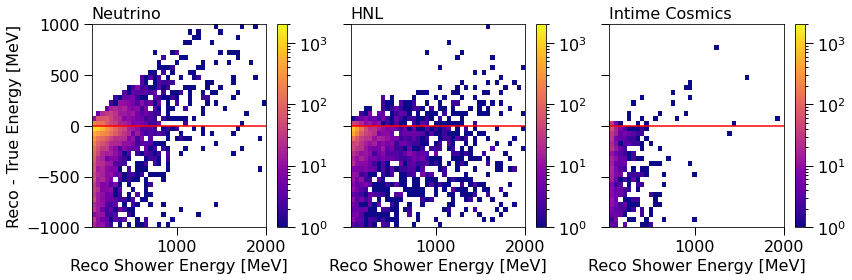

In [48]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4), sharey= True, sharex = True)

xmin, xmax = 50, 2000
xnbin = 40

ymin, ymax = -1000, 1000
ynbin = 40

xlimmin, xlimmax = xmin, xmax
ylimmin, ylimmax = ymin, ymax
#----------------------------------------------
when = df_nu_prim_shw2['slc_opt0_frac'] < 0
plot_2dhist( df_nu_prim_shw2['slc_pfp_shower_energy'][when], df_nu_prim_shw2['reco_truth_diff'][when], 
            ax1, fig, 
            xmin, xmax, ymin, ymax, xnbin, ynbin,
            xlimmin, xlimmax, ylimmin, ylimmax,
            ifcbar =True,
            iflog = True, cmin= 1, cmax =2000,
            #weights = df_nu['scale_pot'],
            title = 'Neutrino', xtitle = 'Reco Shower Energy [MeV]', ytitle= 'Reco - True Energy [MeV]'
                )
#----------------------------------------------
when = df_hnl_prim_shw2['slc_opt0_frac'] < 0
plot_2dhist( df_hnl_prim_shw2['slc_pfp_shower_energy'][when], df_hnl_prim_shw2['reco_truth_diff'][when], 
            ax2, fig, 
            xmin, xmax, ymin, ymax, xnbin, ynbin,
            xlimmin, xlimmax, ylimmin, ylimmax,
            ifcbar =True,
            iflog = True, cmin= 1, cmax =2000,
            #weights = df_hnl['scale_pot'],
            title = 'HNL', xtitle = 'Reco Shower Energy [MeV]', ytitle= ''
                )
#----------------------------------------------
when = df_cos_prim_shw2['slc_opt0_frac'] < 0
plot_2dhist( df_cos_prim_shw2['slc_pfp_shower_energy'][when], df_cos_prim_shw2['reco_truth_diff'][when], 
            ax3, fig, 
            xmin, xmax, ymin, ymax, xnbin, ynbin,
            xlimmin, xlimmax, ylimmin, ylimmax,
            ifcbar =True,
            iflog = True, cmin= 1, cmax =2000,
            #weights = df_cos['scale_pot'],
            title = 'Intime Cosmics', xtitle = 'Reco Shower Energy [MeV]', ytitle= ''
                )
#----------------------------------------------
#plt.ylim(0,40)

ax1.tick_params(bottom = True, top = False, left = True, right = False)
ax1.tick_params(axis = 'x', labelsize = 16, direction = 'out')
ax1.tick_params(axis = 'y', labelsize = 16, direction = 'out')

ax2.tick_params(bottom = True, top = False, left = True, right = False)
ax2.tick_params(axis = 'x', labelsize = 16, direction = 'out')
ax2.tick_params(axis = 'y', labelsize = 16, direction = 'out')

ax3.tick_params(bottom = True, top = False, left = True, right = False)
ax3.tick_params(axis = 'x', labelsize = 16, direction = 'out')
ax3.tick_params(axis = 'y', labelsize = 16, direction = 'out')
#----------------------------------------------
# specifying horizontal line type 
ax1.axhline(y = 0, color = 'r', linestyle = '-') 
ax2.axhline(y = 0, color = 'r', linestyle = '-') 
ax3.axhline(y = 0, color = 'r', linestyle = '-') 
#----------------------------------------------

fig.tight_layout()
plt.savefig(savePath+"truth_energy_shower_like.png", dpi=200)
plt.show()

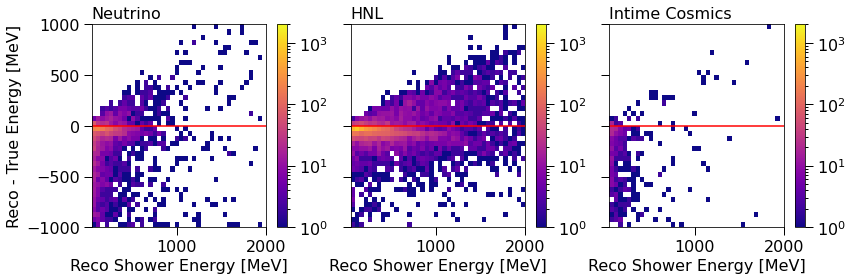

In [52]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4), sharey= True, sharex = True)

xmin, xmax = 50, 2000
xnbin = 40

ymin, ymax = -1000, 1000
ynbin = 40

xlimmin, xlimmax = xmin, xmax
ylimmin, ylimmax = ymin, ymax
#----------------------------------------------
when = df_nu_prim_shw2['slc_opt0_frac'] > 0
plot_2dhist( df_nu_prim_shw2['slc_pfp_shower_energy'][when], df_nu_prim_shw2['reco_truth_diff'][when], 
            ax1, fig, 
            xmin, xmax, ymin, ymax, xnbin, ynbin,
            xlimmin, xlimmax, ylimmin, ylimmax,
            ifcbar =True,
            iflog = True, cmin= 1, cmax =2000,
            #weights = df_nu['scale_pot'],
            title = 'Neutrino', xtitle = 'Reco Shower Energy [MeV]', ytitle= 'Reco - True Energy [MeV]'
                )
#----------------------------------------------
when = df_hnl_prim_shw2['slc_opt0_frac'] > 0
plot_2dhist( df_hnl_prim_shw2['slc_pfp_shower_energy'][when], df_hnl_prim_shw2['reco_truth_diff'][when], 
            ax2, fig, 
            xmin, xmax, ymin, ymax, xnbin, ynbin,
            xlimmin, xlimmax, ylimmin, ylimmax,
            ifcbar =True,
            iflog = True, cmin= 1, cmax =2000,
            #weights = df_hnl['scale_pot'],
            title = 'HNL', xtitle = 'Reco Shower Energy [MeV]', ytitle= ''
                )
#----------------------------------------------
when = df_cos_prim_shw2['slc_opt0_frac'] > 0
plot_2dhist( df_cos_prim_shw2['slc_pfp_shower_energy'][when], df_cos_prim_shw2['reco_truth_diff'][when], 
            ax3, fig, 
            xmin, xmax, ymin, ymax, xnbin, ynbin,
            xlimmin, xlimmax, ylimmin, ylimmax,
            ifcbar =True,
            iflog = True, cmin= 1, cmax =2000,
            #weights = df_cos['scale_pot'],
            title = 'Intime Cosmics', xtitle = 'Reco Shower Energy [MeV]', ytitle= ''
                )
#----------------------------------------------
#plt.ylim(0,40)

ax1.tick_params(bottom = True, top = False, left = True, right = False)
ax1.tick_params(axis = 'x', labelsize = 16, direction = 'out')
ax1.tick_params(axis = 'y', labelsize = 16, direction = 'out')

ax2.tick_params(bottom = True, top = False, left = True, right = False)
ax2.tick_params(axis = 'x', labelsize = 16, direction = 'out')
ax2.tick_params(axis = 'y', labelsize = 16, direction = 'out')

ax3.tick_params(bottom = True, top = False, left = True, right = False)
ax3.tick_params(axis = 'x', labelsize = 16, direction = 'out')
ax3.tick_params(axis = 'y', labelsize = 16, direction = 'out')
#----------------------------------------------
# specifying horizontal line type 
ax1.axhline(y = 0, color = 'r', linestyle = '-') 
ax2.axhline(y = 0, color = 'r', linestyle = '-') 
ax3.axhline(y = 0, color = 'r', linestyle = '-') 
#----------------------------------------------

fig.tight_layout()
plt.savefig(savePath+"truth_energy_shower_like.png", dpi=200)
plt.show()

<h1> Reco - True Diff Energy Opt0 Frac 2D</h1>

<h3>One Shower</h3>

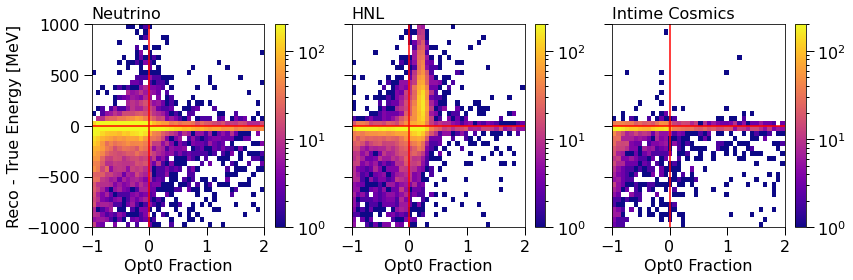

In [32]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4), sharey= True, sharex = True)

xmin, xmax = -1, 2
xnbin = 40

ymin, ymax = -1000, 1000
ynbin = 40

xlimmin, xlimmax = xmin, xmax
ylimmin, ylimmax = ymin, ymax
#----------------------------------------------
plot_2dhist( df_nu_shw1['slc_opt0_frac'], df_nu_shw1['reco_truth_diff'], 
            ax1, fig, 
            xmin, xmax, ymin, ymax, xnbin, ynbin,
            xlimmin, xlimmax, ylimmin, ylimmax,
            ifcbar =True,
            iflog = True, cmin= 1, cmax =200,
            #weights = df_nu['scale_pot'],
            title = 'Neutrino', xtitle = 'Opt0 Fraction', ytitle= 'Reco - True Energy [MeV]'
                )
#----------------------------------------------

plot_2dhist( df_hnl_shw1['slc_opt0_frac'], df_hnl_shw1['reco_truth_diff'], 
            ax2, fig, 
            xmin, xmax, ymin, ymax, xnbin, ynbin,
            xlimmin, xlimmax, ylimmin, ylimmax,
            ifcbar =True,
            iflog = True, cmin= 1, cmax =200,
            #weights = df_hnl['scale_pot'],
            title = 'HNL', xtitle = 'Opt0 Fraction', ytitle= ''
                )
#----------------------------------------------

plot_2dhist( df_cos_shw1['slc_opt0_frac'], df_cos_shw1['reco_truth_diff'], 
            ax3, fig, 
            xmin, xmax, ymin, ymax, xnbin, ynbin,
            xlimmin, xlimmax, ylimmin, ylimmax,
            ifcbar =True,
            iflog = True, cmin= 1, cmax =200,
            #weights = df_cos['scale_pot'],
            title = 'Intime Cosmics', xtitle = 'Opt0 Fraction', ytitle= ''
                )
#----------------------------------------------
#plt.ylim(0,40)

ax1.tick_params(bottom = True, top = False, left = True, right = False)
ax1.tick_params(axis = 'x', labelsize = 16, direction = 'out')
ax1.tick_params(axis = 'y', labelsize = 16, direction = 'out')

ax2.tick_params(bottom = True, top = False, left = True, right = False)
ax2.tick_params(axis = 'x', labelsize = 16, direction = 'out')
ax2.tick_params(axis = 'y', labelsize = 16, direction = 'out')

ax3.tick_params(bottom = True, top = False, left = True, right = False)
ax3.tick_params(axis = 'x', labelsize = 16, direction = 'out')
ax3.tick_params(axis = 'y', labelsize = 16, direction = 'out')
#----------------------------------------------
# specifying horizontal line type 
ax1.axhline(y = 0, color = 'r', linestyle = '-') 
ax2.axhline(y = 0, color = 'r', linestyle = '-') 
ax3.axhline(y = 0, color = 'r', linestyle = '-') 

ax1.axvline(x = 0, color = 'r', linestyle = '-') 
ax2.axvline(x = 0, color = 'r', linestyle = '-') 
ax3.axvline(x = 0, color = 'r', linestyle = '-') 
#----------------------------------------------

fig.tight_layout()
plt.savefig(savePath+"truth_energy_shower_like.png", dpi=200)
plt.show()

<h3>Primary Two+ Shower</h3>

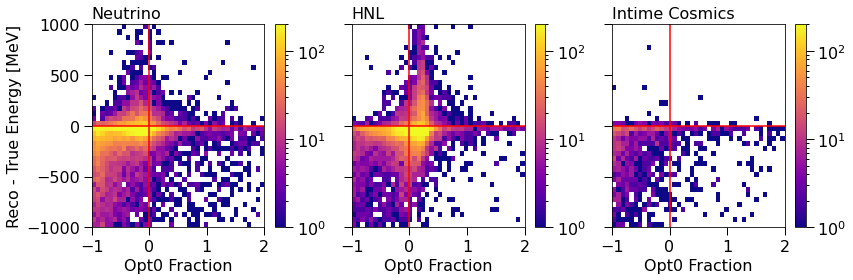

In [34]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4), sharey= True, sharex = True)

xmin, xmax = -1, 2
xnbin = 40

ymin, ymax = -1000, 1000
ynbin = 40

xlimmin, xlimmax = xmin, xmax
ylimmin, ylimmax = ymin, ymax
#----------------------------------------------
plot_2dhist( df_nu_prim_shw2['slc_opt0_frac'], df_nu_prim_shw2['reco_truth_diff'], 
            ax1, fig, 
            xmin, xmax, ymin, ymax, xnbin, ynbin,
            xlimmin, xlimmax, ylimmin, ylimmax,
            ifcbar =True,
            iflog = True, cmin= 1, cmax =200,
            #weights = df_nu['scale_pot'],
            title = 'Neutrino', xtitle = 'Opt0 Fraction', ytitle= 'Reco - True Energy [MeV]'
                )
#----------------------------------------------

plot_2dhist( df_hnl_prim_shw2['slc_opt0_frac'], df_hnl_prim_shw2['reco_truth_diff'], 
            ax2, fig, 
            xmin, xmax, ymin, ymax, xnbin, ynbin,
            xlimmin, xlimmax, ylimmin, ylimmax,
            ifcbar =True,
            iflog = True, cmin= 1, cmax =200,
            #weights = df_hnl['scale_pot'],
            title = 'HNL', xtitle = 'Opt0 Fraction', ytitle= ''
                )
#----------------------------------------------

plot_2dhist( df_cos_prim_shw2['slc_opt0_frac'], df_cos_prim_shw2['reco_truth_diff'], 
            ax3, fig, 
            xmin, xmax, ymin, ymax, xnbin, ynbin,
            xlimmin, xlimmax, ylimmin, ylimmax,
            ifcbar =True,
            iflog = True, cmin= 1, cmax =200,
            #weights = df_cos['scale_pot'],
            title = 'Intime Cosmics', xtitle = 'Opt0 Fraction', ytitle= ''
                )
#----------------------------------------------
#plt.ylim(0,40)

ax1.tick_params(bottom = True, top = False, left = True, right = False)
ax1.tick_params(axis = 'x', labelsize = 16, direction = 'out')
ax1.tick_params(axis = 'y', labelsize = 16, direction = 'out')

ax2.tick_params(bottom = True, top = False, left = True, right = False)
ax2.tick_params(axis = 'x', labelsize = 16, direction = 'out')
ax2.tick_params(axis = 'y', labelsize = 16, direction = 'out')

ax3.tick_params(bottom = True, top = False, left = True, right = False)
ax3.tick_params(axis = 'x', labelsize = 16, direction = 'out')
ax3.tick_params(axis = 'y', labelsize = 16, direction = 'out')
#----------------------------------------------
# specifying horizontal line type 
ax1.axhline(y = 0, color = 'r', linestyle = '-') 
ax2.axhline(y = 0, color = 'r', linestyle = '-') 
ax3.axhline(y = 0, color = 'r', linestyle = '-') 

ax1.axvline(x = 0, color = 'r', linestyle = '-') 
ax2.axvline(x = 0, color = 'r', linestyle = '-') 
ax3.axvline(x = 0, color = 'r', linestyle = '-') 
#----------------------------------------------

fig.tight_layout()
plt.savefig(savePath+"truth_energy_shower_like.png", dpi=200)
plt.show()